In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
wcss_list = []
silhouette_scores = []

for i in range(2, 11):
    kmeans_test = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans_test.fit(x_scaled)
    wcss_list.append(kmeans_test.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans_test.labels_))


Text(0, 0.5, 'Silhouette scores')

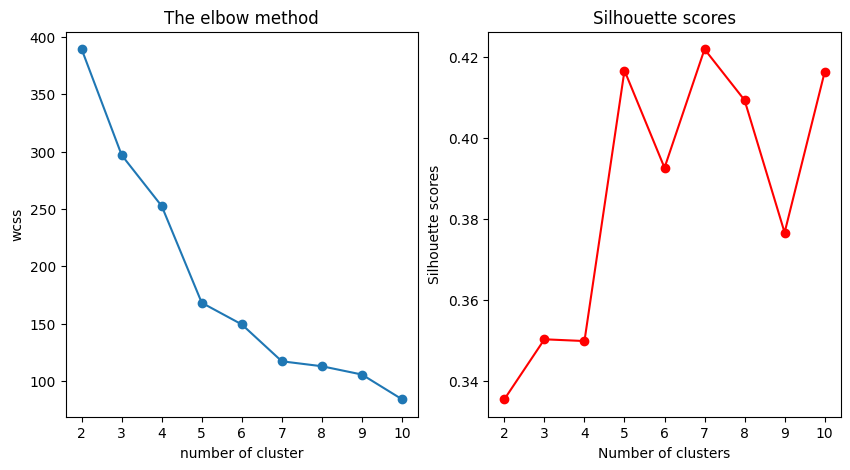

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(2,11), wcss_list, marker='o')
plt.title("The elbow method")
plt.xlabel("number of cluster")
plt.xticks(np.arange(2,11))
plt.ylabel("wcss")

plt.subplot(1,2,2)
plt.plot(range(2,11), silhouette_scores, marker='o', color='red')
plt.title('Silhouette scores')
plt.xlabel("Number of clusters")
plt.xticks(np.arange(2,11))
plt.ylabel("Silhouette scores")

In [14]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init="k-means++", random_state=0)
y_means = kmeans.fit_predict(x_scaled)

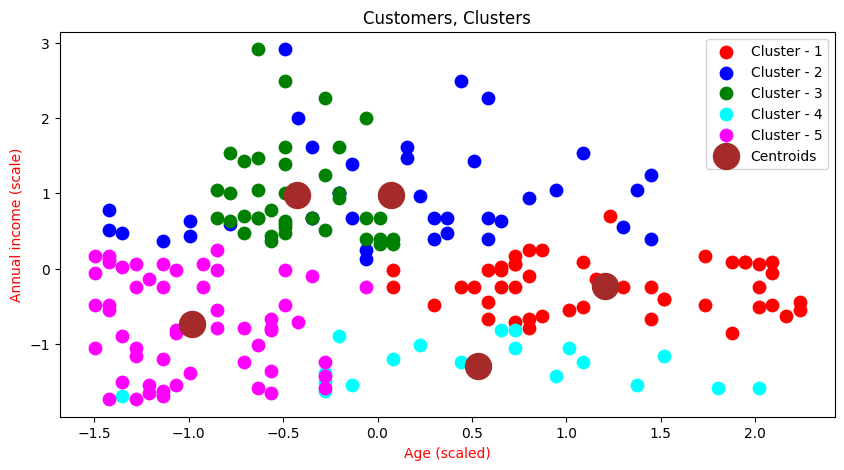

In [18]:
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(optimal_clusters):
    plt.scatter(x_scaled[y_means == i, 0], x_scaled[y_means == i, 1], s=80, c=colors[i], label=f'Cluster - {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=350, c='brown', label='Centroids')
plt.title("Customers, Clusters")
plt.xlabel('Age (scaled)', color='red')
plt.ylabel('Annual income (scale)', color='red')
plt.legend()
plt.show()

In [20]:
df['Cluster'] = y_means
cluster_profile_spending = df.groupby('Cluster')["Spending Score (1-100)"].mean()
cluster_profile_spending

Cluster
0    48.851064
1    19.358974
2    81.525000
3    18.350000
4    62.240741
Name: Spending Score (1-100), dtype: float64

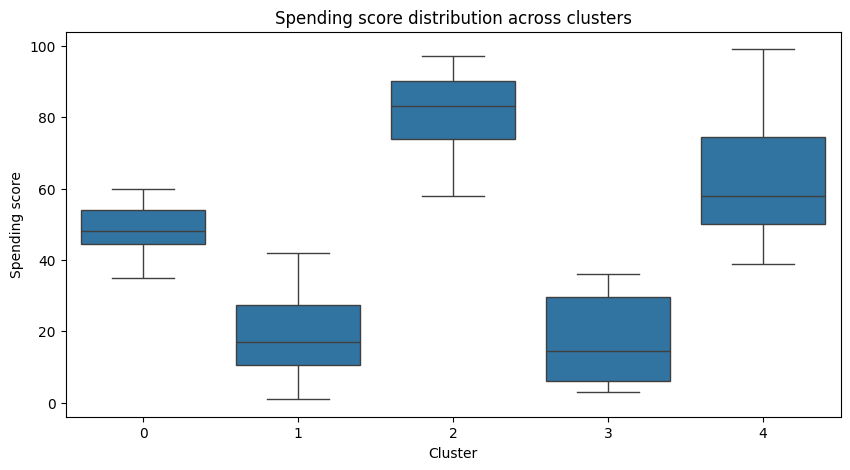

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title("Spending score distribution across clusters")
plt.xlabel("Cluster")
plt.ylabel("Spending score")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'histplot'

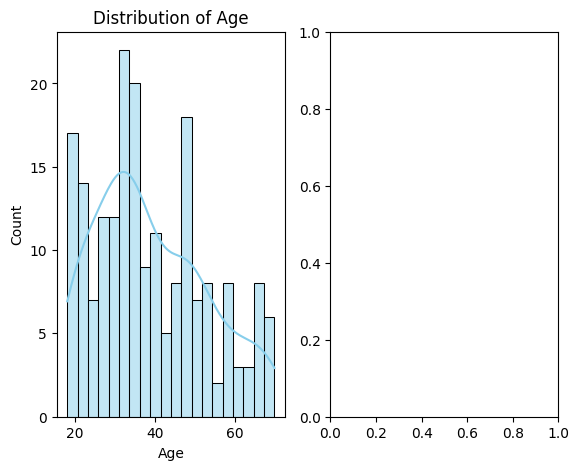

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")

plt.subplot(1,3,2)
plt.histplot(data=df, x='Annual Income (k$)', bins=20, color='salmon')
plt.title("Distribution of Annual income")
plt.xlabel("Annual income")

plt.subplot(1,3,3)
plt.histplot(data=df, x='Spending Score (1-100)', bins=20, color='green')
plt.title("Distribution of Spending Score")
plt.xlabel("Spending Score")